# Problem set 1

### Antoine BEDANIAN Nicolas de LESTABLE Ivan SCHOENENBERGER Maxime RICHARDI 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize

## Exercie 3 

In [25]:
b= [np.exp(-0.06*1),np.exp(-0.058*2),np.exp(-0.0562*3),np.exp(-0.0546*4),np.exp(-0.0533*5),np.exp(-0.0525*6),np.exp(-0.052*7),np.exp(-0.0516*8),np.exp(-0.05125*9),np.exp(-0.05100*10)]
#Portfolio 
portfolio=6*b[0]+8*b[1]+106*b[2]+7*b[3]+0*b[4]+102*b[5]+3*b[6]+3*b[7]+3*b[8]+110*b[9]
#Bond 1
bond1=4*b[0]+4*b[1]+4*b[2]+4*b[3]+4*b[4]+4*b[5]+104*b[6]
#Bond 2
bond2=10*b[0]+10*b[1]+10*b[2]+10*b[3]+10*b[4]+10*b[5]+10*b[6]+110*b[7]

In [26]:
print(portfolio)
print(bond1)
print(bond2)

254.409295494
92.1756253141
129.513673737


In [27]:
duration_portfolio=(1*6*b[0]+2*8*b[1]+3*106*b[2]+4*7*b[3]+5*0*b[4]+6*102*b[5]+7*3*b[6]+8*3*b[7]+9*3*b[8]+10*110*b[9])/portfolio
duration_bond1=(1*4*b[0]+2*4*b[1]+3*4*b[2]+4*4*b[3]+5*4*b[4]+6*4*b[5]+7*104*b[6])/bond1
duration_bond2=(1*10*b[0]+2*10*b[1]+3*10*b[2]+4*10*b[3]+5*10*b[4]+6*10*b[5]+7*10*b[6]+8*110*b[7])/bond2

In [28]:
print(duration_portfolio)
print(duration_bond1)
print(duration_bond2)

5.76135022907
6.21212737952
6.16024913527


In [29]:
convexity_portfolio=(1**2*6*b[0]+2**2*8*b[1]+3**2*106*b[2]+4**2*7*b[3]+5**2*0*b[4]+6**2*102*b[5]+7**2*3*b[6]+8**2*3*b[7]+9**2*3*b[8]+10**2*110*b[9])/portfolio
convexity_bond1=(1**2*4*b[0]+2**2*4*b[1]+3**2*4*b[2]+4**2*4*b[3]+5**2*4*b[4]+6**2*4*b[5]+7**2*104*b[6])/bond1
convexity_bond2=(1**2*10*b[0]+2**2*10*b[1]+3**2*10*b[2]+4**2*10*b[3]+5**2*10*b[4]+6**2*10*b[5]+7**2*10*b[6]+8**2*110*b[7])/bond2

In [30]:
print(convexity_portfolio)
print(convexity_bond1)
print(convexity_bond2)

41.6565582217
41.4722797487
44.0374377641


In [31]:
temp = np.eye(2)
temp[0,0]= -duration_bond1*bond1
temp[0,1]= -duration_bond2*bond2
temp[1,0]= convexity_bond1*bond1
temp[1,1]= convexity_bond2*bond2

sol = np.linalg.inv(temp) @ [duration_portfolio*portfolio,-convexity_portfolio*portfolio]

In [32]:
sol

array([ 0.44249593, -2.15472369])

In [33]:
def value_curve(shift,q1,q2):
    b= [np.exp(-(0.06+shift)*1),np.exp(-(0.058+shift)*2),np.exp(-(0.0562+shift)*3),np.exp(-(0.0546+shift)*4),np.exp(-(0.0533+shift)*5),np.exp(-(0.0525+shift)*6),np.exp(-(0.052+shift)*7),np.exp(-(0.0516+shift)*8),np.exp(-(0.05125+shift)*9),np.exp(-(0.05100+shift)*10)]
    port_coupon=[6.,8.,106.,7.,0.,102.,3.,3.,3.,110.]
    bond1_coupon=[4.,4.,4.,4.,4.,4.,104.,0.,0.,0.]
    bond2_coupon=[10.,10.,10.,10.,10.,10.,10.,110.,0.,0.]
    hedge_coupon=[]
    for i in range(0,10):
        temp= port_coupon[i]+q1*bond1_coupon[i]+q2*bond2_coupon[i]
        hedge_coupon=np.append(hedge_coupon,temp)
    
    hedge_value = np.sum(np.multiply(hedge_coupon,b))
    return hedge_value

In [34]:
def value_hedged(shift):
    b= [np.exp(-(0.06+shift)*1),np.exp(-(0.058+shift)*2),np.exp(-(0.0562+shift)*3),np.exp(-(0.0546+shift)*4),np.exp(-(0.0533+shift)*5),np.exp(-(0.0525+shift)*6),np.exp(-(0.052+shift)*7),np.exp(-(0.0516+shift)*8),np.exp(-(0.05125+shift)*9),np.exp(-(0.05100+shift)*10)]
    port_coupon=[6.,8.,106.,7.,0.,102.,3.,3.,3.,110.]
    bond1_coupon=[4.,4.,4.,4.,4.,4.,104.,0.,0.,0.]
    bond2_coupon=[10.,10.,10.,10.,10.,10.,10.,110.,0.,0.]
    hedge_coupon=[]
    
    portfolio=6*b[0]+8*b[1]+106*b[2]+7*b[3]+0*b[4]+102*b[5]+3*b[6]+3*b[7]+3*b[8]+110*b[9]
    #Bond 1
    bond1=4*b[0]+4*b[1]+4*b[2]+4*b[3]+4*b[4]+4*b[5]+104*b[6]
    #Bond 2
    bond2=10*b[0]+10*b[1]+10*b[2]+10*b[3]+10*b[4]+10*b[5]+10*b[6]+110*b[7]
    
    duration_portfolio=(1*6*b[0]+2*8*b[1]+3*106*b[2]+4*7*b[3]+5*0*b[4]+6*102*b[5]+7*3*b[6]+8*3*b[7]+9*3*b[8]+10*110*b[9])/portfolio
    duration_bond1=(1*4*b[0]+2*4*b[1]+3*4*b[2]+4*4*b[3]+5*4*b[4]+6*4*b[5]+7*104*b[6])/bond1
    duration_bond2=(1*10*b[0]+2*10*b[1]+3*10*b[2]+4*10*b[3]+5*10*b[4]+6*10*b[5]+7*10*b[6]+8*110*b[7])/bond2
    
    convexity_portfolio=(1**2*6*b[0]+2**2*8*b[1]+3**2*106*b[2]+4**2*7*b[3]+5**2*0*b[4]+6**2*102*b[5]+7**2*3*b[6]+8**2*3*b[7]+9**2*3*b[8]+10**2*110*b[9])/portfolio
    convexity_bond1=(1**2*4*b[0]+2**2*4*b[1]+3**2*4*b[2]+4**2*4*b[3]+5**2*4*b[4]+6**2*4*b[5]+7**2*104*b[6])/bond1
    convexity_bond2=(1**2*10*b[0]+2**2*10*b[1]+3**2*10*b[2]+4**2*10*b[3]+5**2*10*b[4]+6**2*10*b[5]+7**2*10*b[6]+8**2*110*b[7])/bond2
    
    temp = np.eye(2)
    temp[0,0]= -duration_bond1*bond1
    temp[0,1]= -duration_bond2*bond2
    temp[1,0]= convexity_bond1*bond1
    temp[1,1]= convexity_bond2*bond2

    #q = np.linalg.inv(temp) @ [duration_portfolio*portfolio,-convexity_portfolio*portfolio]
    
    for i in range(0,10):
        temp= port_coupon[i]+sol[0]*bond1_coupon[i]+sol[1]*bond2_coupon[i]
        hedge_coupon=np.append(hedge_coupon,temp)
    
    hedge_value = np.sum(np.multiply(hedge_coupon,b))
    return hedge_value

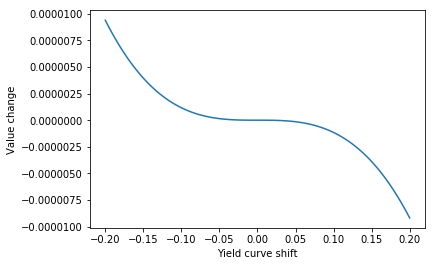

In [35]:
grid=np.linspace(-0.002,0.002,100)
result=[]
for i in range(0,len(grid)):
    temp=value_hedged(grid[i])-value_hedged(0)
    result=np.append(result,temp)
plt.plot(grid*100,result)
plt.xlabel("Yield curve shift")
plt.ylabel("Value change")
plt.show()

In [36]:
##EXO 4

In [37]:
def caplet_black(y,f,sigma,k,t,t0,t1):
    p = np.exp(-y*(t1-t))
    d = t1-t0
    d1 = (np.log(f/k)+ 0.5*sigma**2*(t0-t))/(sigma*np.sqrt(t0-t))
    d2 = (np.log(f/k)- 0.5*sigma**2*(t0-t))/(sigma*np.sqrt(t0-t))
    
    return d*p*(f*scipy.stats.norm.cdf(d1)-k*scipy.stats.norm.cdf(d2))



In [38]:
caplet_black(0.03,0.04,0.4945,0.04,0,4,5)

0.013049947392014823

In [39]:
form=1*np.exp(-0.03*5)*0.04*(scipy.stats.norm.cdf(0.4945)-scipy.stats.norm.cdf(-0.4945))

In [40]:
sigma = form/(1*np.exp(-0.03*5)*2*(1/np.sqrt(2*np.pi)))
print(sigma)

0.0190025932205


### Exercie 4

In [41]:
delta = 1 
t = 0 
Ti_1 = 4
Ti = 5
k = np.array([1,1.5,2,3,3.5,4,5,6,7,8,9])/100
F045 = 0.04
y05 = 0.03
P05 = np.exp(-(Ti-t)*y05)
D = (F045*np.array([1]) - k)/(sigma*np.sqrt(Ti_1 - t))
caplet_bachelier = delta*P05*sigma*np.sqrt(Ti_1 - t)*(D*scipy.stats.norm.cdf(D)+scipy.stats.norm.pdf(D))

In [42]:
caplet_bachelier

array([ 0.02982761,  0.02653463,  0.02342343,  0.01780264,  0.01531449,
        0.01304995,  0.00919556,  0.00620927,  0.00400638,  0.00246367,
        0.00144053])

In [43]:
def black_caplet(sigma):
    F045 = 0.04
    y05 = 0.03
    delta = 1 
    t = 0 
    Ti_1 = 4
    Ti = 5
    P05 = np.exp(-(Ti-t)*y05)
    d1 = (np.log(F045/k)+ 0.5*sigma**2*(Ti_1-t))/(sigma*np.sqrt(Ti_1-t))
    d2 = (np.log(F045/k) - 0.5*sigma**2*(Ti_1-t))/(sigma*np.sqrt(Ti_1-t))
    return (delta*P05*(F045*scipy.stats.norm.cdf(d1)-k*scipy.stats.norm.cdf(d2)) - cp)**2

K = np.array([1,1.5,2,3,3.5,4,5,6,7,8,9])/100
res = []
for i in range(0,len(K)):
    k = K[i]
    cp = caplet_bachelier[i]
    res += [scipy.optimize.minimize(black_caplet,0.8).x]   

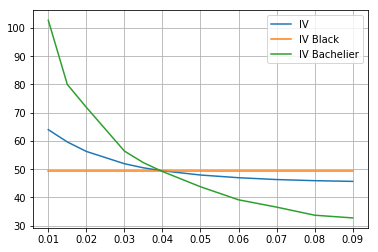

In [44]:
iv = [64,59.65,56.30,51.95,50.50,49.45,47.95,47,46.35,45.95,45.7]
black = [49.45]*len(iv)
res = 100*np.array(res)
plt.plot(K,iv,label = 'IV')
plt.plot(K,black, label = 'IV Black')
plt.plot(K,res, label = 'IV Bachelier')
plt.legend()
plt.grid()
plt.show()

In [45]:
sigma = 49.45/100
beta = 0.75
delta = 1 
t = 0 
Ti_1 = 4
Ti = 5
F045 = 0.04
y05 = 0.03
K = np.array([1,1.5,2,3,3.5,4,5,6,7,8,9])/100
dd = caplet_black(y05,F045/beta,beta*sigma,K+F045*(1/beta-1),t,Ti_1,Ti)

In [46]:
def dd_caplet(sigma):
    F045 = 0.04
    y05 = 0.03
    delta = 1 
    t = 0 
    Ti_1 = 4
    Ti = 5
    P05 = np.exp(-(Ti-t)*y05)
    d1 = (np.log(F045/k)+ 0.5*sigma**2*(Ti_1-t))/(sigma*np.sqrt(Ti_1-t))
    d2 = (np.log(F045/k) - 0.5*sigma**2*(Ti_1-t))/(sigma*np.sqrt(Ti_1-t))
    return (delta*P05*(F045*scipy.stats.norm.cdf(d1)-k*scipy.stats.norm.cdf(d2)) - Dd)**2

dd_iv = []
for i in range(0,len(K)):
    k = K[i]
    Dd = dd[i]
    dd_iv += [scipy.optimize.minimize(dd_caplet,1).x]  
dd_iv = np.array(dd_iv)*100

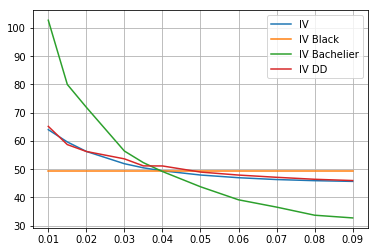

In [47]:
plt.plot(K,iv,label = 'IV')
plt.plot(K,black, label = 'IV Black')
plt.plot(K,res, label = 'IV Bachelier')
plt.plot(K,dd_iv, label = 'IV DD')
plt.legend()
plt.grid()
plt.show()